In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import  classification_report, confusion_matrix

In [7]:
data=make_blobs(n_samples=5000, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [8]:
data

(array([[-10.22530174,  -5.10123895],
        [  4.94302351,   7.91480104],
        [ -6.42005601,   6.01331231],
        ...,
        [ -5.77225696,   6.08129091],
        [ -8.37779611,  -9.00979465],
        [ -8.90301868,  -6.31604429]]),
 array([1, 2, 3, ..., 3, 1, 1]))

In [9]:
type(data)

tuple

In [10]:
data[0].shape

(5000, 2)

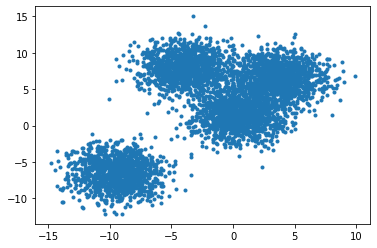

In [11]:
plt.scatter(data[0][:, 0], data[0][:, 1], marker='.')

In [12]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(data[0])
#we can try for differnt value of k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 0, ..., 0, 1, 1])

In [14]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-3.91013155,  7.90166073],
       [-9.43110361, -6.54193501],
       [ 3.75677042,  6.67126649],
       [ 0.40998046,  1.31439822]])

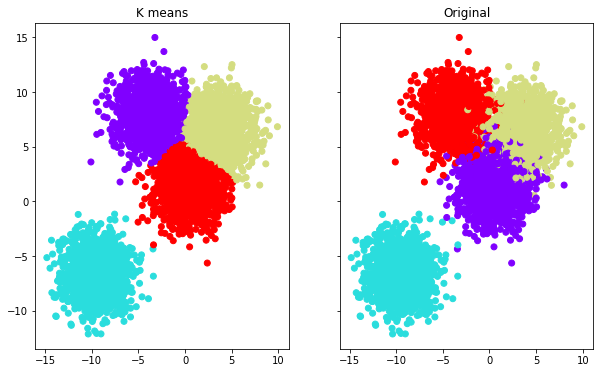

In [15]:
'''comparison'''
fig, (ax1, ax2)=plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K means')
ax1.scatter(data[0][:,0], data[0][:,1], c=k_means_labels, cmap='rainbow'  )

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow' )

[]

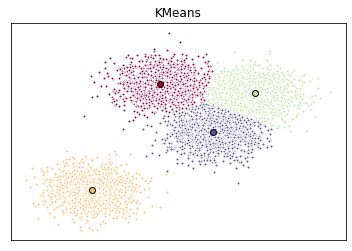

In [16]:
'''visualize plot with centre point'''
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)
# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    # Plots the datapoints with color col.
    ax.plot(data[0][my_members, 0], data[0][my_members, 1], 'w', markerfacecolor=col, marker='.')
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(()) # Remove y-axis ticks


In [17]:
'''Evaluation''' # we do not usually have label for clustering, but we have now, so we have evaluation
print(classification_report(data[1], k_means_labels))
print(confusion_matrix(data[1], k_means_labels))


              precision    recall  f1-score   support

           0       0.01      0.01      0.01      1250
           1       1.00      1.00      1.00      1250
           2       0.93      0.95      0.94      1250
           3       0.01      0.01      0.01      1250

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000

[[  15    1   63 1171]
 [   0 1247    0    3]
 [  19    0 1187   44]
 [1215    0   20   15]]
